Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF) are two essential tools used to understand the properties of time series data, particularly for building ARIMA models. They help identify the appropriate number of autoregressive (AR) terms (p) and moving average (MA) terms (q) in the model.

**1. Autocorrelation Function (ACF):**
    
Definition: The ACF measures the correlation between the time series and its lagged values at different time lags. 
    
    In simpler terms, it shows how the current value of the series is related to its past values at various time intervals.

Usage:

It helps identify the moving average (MA) order (q) in an ARIMA model.
    
It tells us if the series has any serial correlation (correlation with its own past values).
    
Interpreting ACF Plot:

A significant spike at lag q (after which it tapers off) suggests an MA(q) process.
If the ACF plot gradually declines, it suggests the series is non-stationary, and differencing might be needed.
    
**2. Partial Autocorrelation Function (PACF):**
Definition: The PACF measures the correlation between the time series and its lagged values, after removing the effect of earlier lags. 
    
    In other words, PACF shows the direct relationship between a time series and its lag, excluding the indirect relationships through intermediate lags.

Usage:

It helps identify the autoregressive (AR) order (p) in an ARIMA model.
    
PACF isolates the contribution of each lag to the current value of the series, without considering the influence of previous lags.
    
Interpreting PACF Plot:

A significant spike at lag p (after which it drops off) suggests an AR(p) process.
If the PACF plot shows a sharp cut-off after a specific lag, that lag might represent the AR order of the model.
    
Example of ACF and PACF Plots:
Here’s how you can generate and interpret ACF and PACF plots using Python:

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'data' is your time series data
plot_acf(data, lags=20)  # Autocorrelation plot up to 20 lags
plot_pacf(data, lags=20)  # Partial autocorrelation plot up to 20 lags
plt.show()


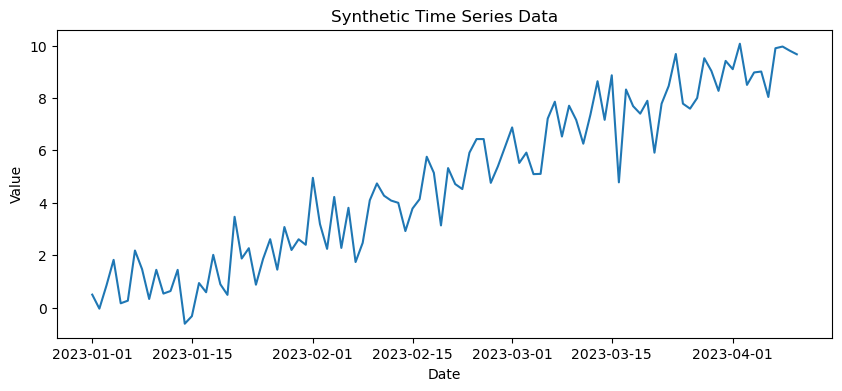

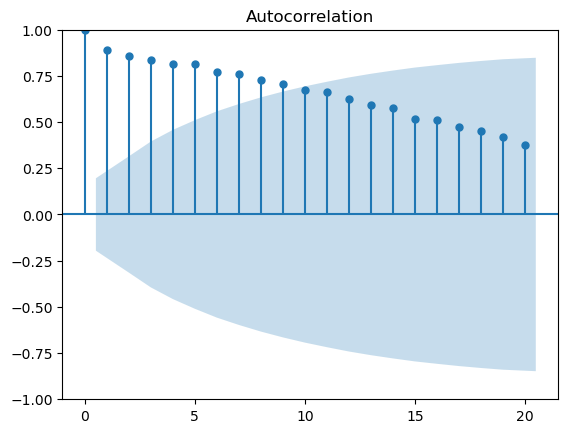

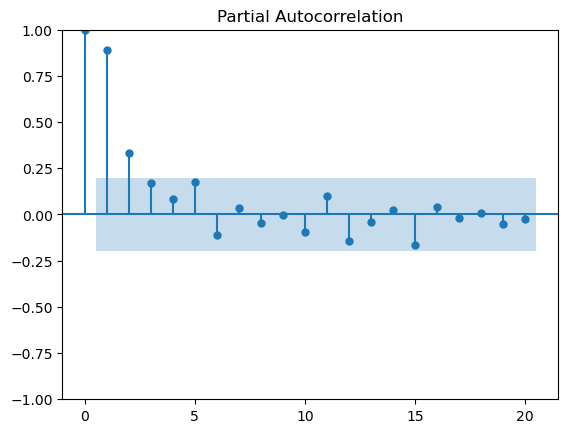

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Creating synthetic time series data (100 daily points)
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) + np.arange(100) * 0.1  # Trend + random noise
data = pd.Series(values, index=dates)

# Plotting the time series data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Step 3: Plot ACF and PACF
# ACF plot
plot_acf(data, lags=20)  # Plotting 20 lags for autocorrelation
plt.show()

# PACF plot
plot_pacf(data, lags=20)  # Plotting 20 lags for partial autocorrelation
plt.show()


**Steps to Determine p and q:**

**Determine p (AR order) from the PACF plot:**

- Look for the lag after which the partial autocorrelations drop off to near zero (or become insignificant).

- The number of significant lags (spikes) in the PACF plot suggests the order of the AR (autoregressive) part of the ARIMA model, denoted as p.

For example, if the PACF plot shows significant spikes up to lag 2 and then drops off, you might choose p = 2.

**Determine q (MA order) from the ACF plot:**

- Similarly, look for the lag after which the autocorrelations in the ACF plot drop off to near zero.
    
- The number of significant lags (spikes) in the ACF plot suggests the order of the MA (moving average) part of the ARIMA model, denoted as q.

- For example, if the ACF plot shows significant spikes up to lag 1 and then drops off, you might choose q = 1.

**How to Identify Significant Spikes:**

- Significant spike: Any spike that exceeds the confidence interval bounds (shown as the blue shaded area or horizontal dashed lines in the ACF and PACF plots) is considered significant.

- Drop-off pattern: After the significant spikes, the correlations should drop off to near zero or become insignificant, which indicates the relevant lag to use.


**Example Interpretation:**

- Let’s say you plot the ACF and PACF for your time series, and this is what you observe:

**PACF Plot:**  The first 2 lags (lag 1 and lag 2) show significant spikes, and after lag 2, the spikes drop off.
    
**Conclusion for p: Choose p = 2.**

- **ACF Plot:** The first lag (lag 1) shows a significant spike, but after lag 1, the spikes drop off.
    
- Conclusion for q: Choose q = 1.